## Exploring Phenotypic Response Based on Associations Between Diet and Genotypyic Factors 

### Using multivariate linear regression, I explore different phenotypic changes caused by the interaction of genetic variants and type of diet intervention. 

### 3 diet groups were examined in this study, and they were broken up based on amount of calories allowed per day and amount of fasting required per week. 

### Adiponectin and Leptin are common plasma biomarkers that are used for health status related to obesity. 

### BMI and Body Fat measurments were also analyzed to determine which diet and which genetic variants contributed the most to diet response. 

### Regression modeling was completed using Plink and R with the results saved into Excel spreadsheets to be visualized. 

### The most significant genetics variants associated with response to diet are observed below. 

In [2]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [355]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import * 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_context("poster", rc={"font.size":30,"axes.titlesize":30, "axes.labelsize":30})

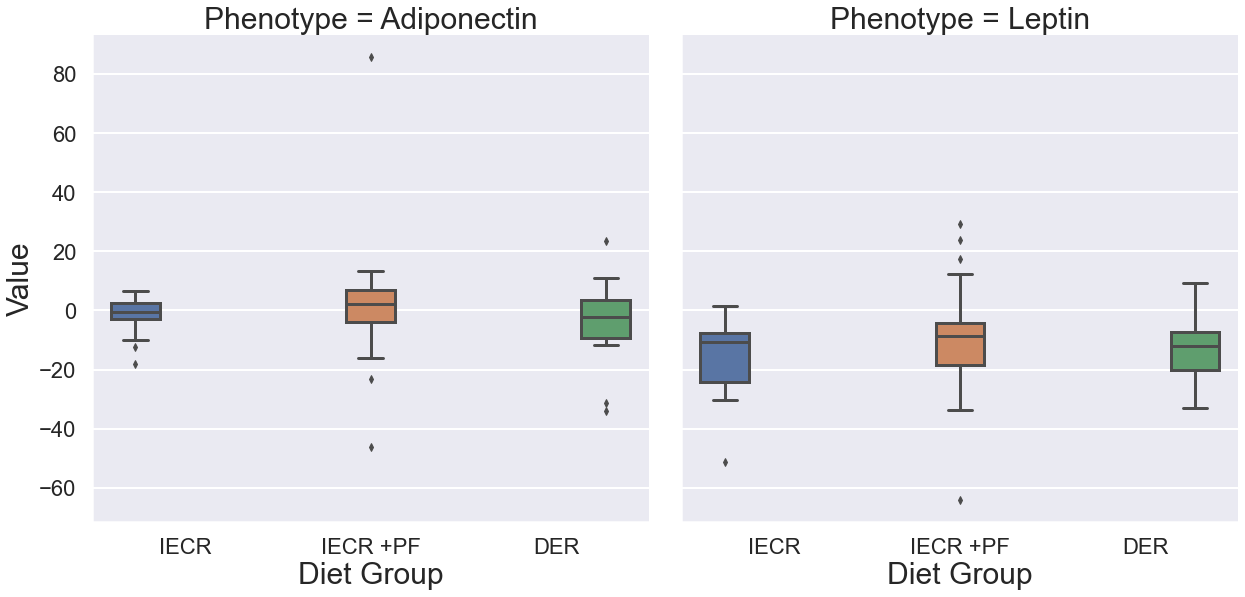

In [356]:
lep = pd.read_excel("leptin.xlsx")

l = sns.catplot(x="Diet Group", y="Value", hue="Diet Group",
                col="Phenotype", data=lep, kind="box",
               height= 9, aspect=1)


#l.savefig("leptin.png")

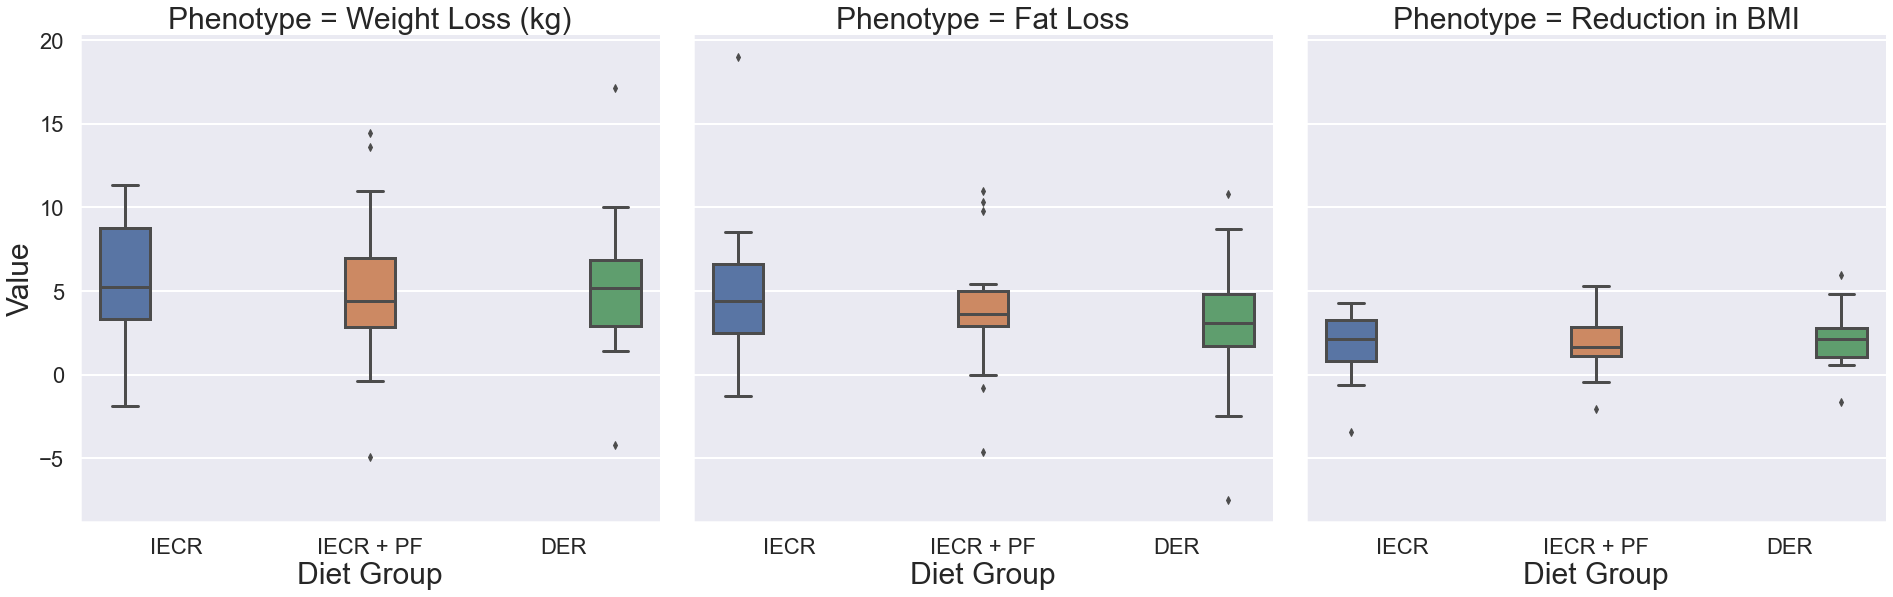

In [357]:

data = pd.read_excel("wbf.xlsx")
w = pd.read_excel("w.xlsx")
b = pd.read_excel("b.xlsx")
f = pd.read_excel("f.xlsx")
change = pd.read_excel("change.xlsx")
change

#f
#sns.pairplot(data=w, hue='Diet Type')
median_f = f.groupby("Diet Group").median().values
median_w = w.groupby("Diet Group").median().values
median_b = b.groupby("Diet Group").median().values


#pos = range(len(median_f))
# for tick,label in zip(pos,ax.get_xticklabels()):
#     ax.text(pos[tick], median_f[tick] + 0.03, )

# fig, axes = plt.subplots(3,1, figsize=(18,10))
# fig.suptitle("Dietary Responses After 3 Months")
# sns.boxplot(ax=axes[0], data=w, x="Diet Group", y="Weight Loss (kg)")
# sns.boxplot(ax=axes[1], data=b, x="Diet Group", y="Decrease in BMI")
# sns.boxplot(ax=axes[2], data=f, x="Diet Group", y="Fat Loss")

#medians = change.groupby(["Test"])("Value").median().values
#medians


g = sns.catplot(x="Diet Group", y="Value", hue="Diet Group",
                col="Phenotype", data=change, kind="box",
               height= 9, aspect=1)

g.savefig("boxplot.png")

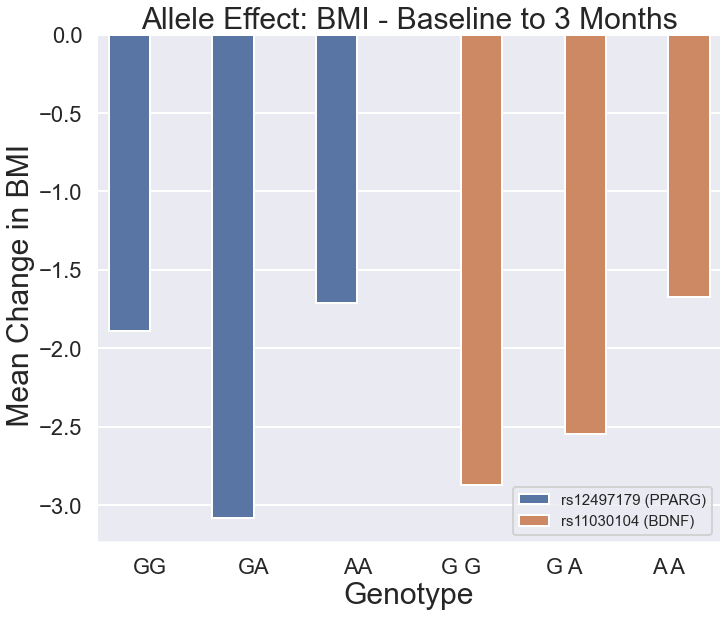

In [358]:
data = { 'mean': [-1.889,-3.084,-1.715,-2.873,-2.549,-1.675,0,0,0,0,0,0],
         #'mean': [-1.889,-3.084,-1.715,-2.873,-2.549,-1.675],
         'allele': ["GG","GA", "AA","G G","G A","A A","G G","G A", "A A","GG","GA","AA"],
         'Gene': ["rs12497179 (PPARG)","rs12497179 (PPARG)","rs12497179 (PPARG)","rs11030104 (BDNF)","rs11030104 (BDNF)","rs11030104 (BDNF)","rs12497179 (PPARG)","rs12497179 (PPARG)","rs12497179 (PPARG)","rs11030104 (BDNF)","rs11030104 (BDNF)","rs11030104 (BDNF)"],
         'sd' : [.2831,1.304,1.501,2.168,1.162,1.603,.2831,1.304,1.501,2.168,1.162,1.603]
       }
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data, columns=data.keys())

gene= sns.catplot(data=df, kind="bar", x="allele", y="mean",
               hue="Gene", legend_out=False, height=9,aspect= 1.2)
gene.despine(left=True)
gene.set_axis_labels("Genotype"," Mean Change in BMI")

plt.title("Allele Effect: BMI - Baseline to 3 Months")
plt.legend(fontsize=15)
#gene.savefig("BMI_gene.png")



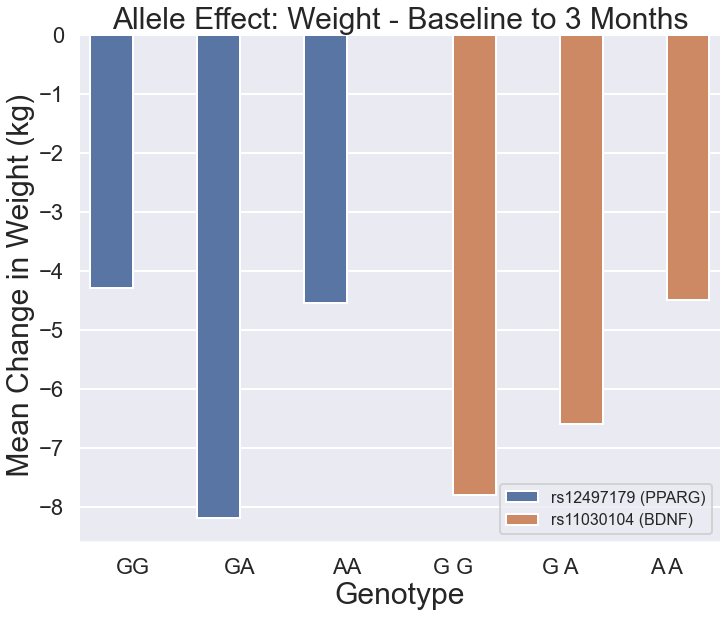

In [359]:
weight_data = { 'mean': [-4.3,-8.193,-4.555,-7.8,-6.59,-4.501],
         'allele': ["GG","GA", "AA","G G","G A","A A"],
         'Gene': ["rs12497179 (PPARG)","rs12497179 (PPARG)","rs12497179 (PPARG)","rs11030104 (BDNF)","rs11030104 (BDNF)","rs11030104 (BDNF)"],
         'sds' : [0,3.387,3.945,5.971,2.745,4.332]
       }
import pandas as pd
import matplotlib.pyplot as plt
weight = pd.DataFrame(weight_data, columns=data.keys())

df1 = sns.catplot(data=weight, kind="bar", x="allele", y="mean",
               hue="Gene", ci= "sds", legend_out=False, height=9, aspect=1.2)
df1.despine(left=True)
df1.set_axis_labels("Genotype"," Mean Change in Weight (kg)")

plt.title("Allele Effect: Weight - Baseline to 3 Months")
plt.legend(fontsize=16)
df1.savefig("weight_gene.png")

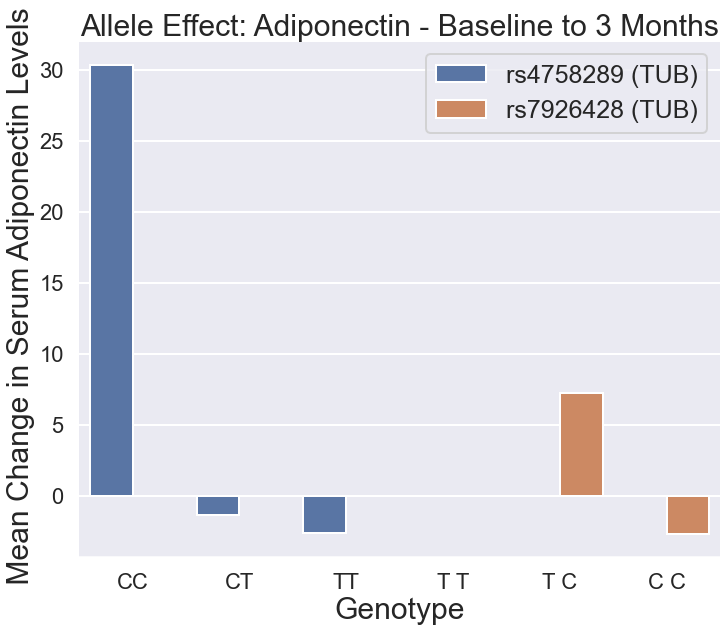

In [360]:
adiponectin = { 'mean': [30.32,-1.352,-2.623,0,7.218,-2.674],
                'allele': ["CC","CT","TT","T T","T C","C C"],
                'Gene': ["TUB","TUB","TUB","TUB","TUB","TUB"],
                'sd' : [48.98,11.6,12,0,24.18,12.8],
                'snp': ["rs4758289 (TUB)","rs4758289 (TUB)","rs4758289 (TUB)","rs7926428 (TUB)","rs7926428 (TUB)","rs7926428 (TUB)"]
                }
import pandas as pd
import matplotlib.pyplot as plt

adipo = pd.DataFrame(adiponectin, columns=adiponectin.keys())

df2 = sns.catplot(data=adipo, kind="bar", x="allele", y="mean",
                 hue="snp",legend_out=False, height=9, aspect=1.2)
df2.despine(left=True)
df2.set_axis_labels("Genotype"," Mean Change in Serum Adiponectin Levels")
#df2.text(.85,.85,"Both Mutations Occur on gene TUB")

plt.title("Allele Effect: Adiponectin - Baseline to 3 Months")
plt.legend(loc="upper right",fontsize=25)
#gene.savefig("adipo.png")

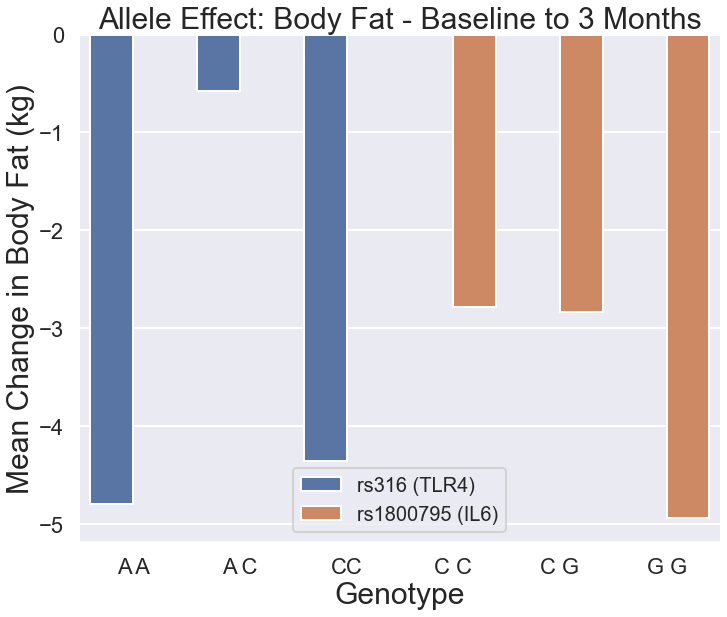

In [361]:
bodyfat = { 'mean': [-4.8,-.579,-4.359,-2.78,-2.83,-4.94],
                'allele': ["A A","A C", "CC", "C C", "C G", "G G"],
                'Gene': ["rs316 (TLR4)","rs316 (TLR4)","rs316 (TLR4)","rs1800795 (IL6)","rs1800795 (IL6)","rs1800795 (IL6)"],
                'sd' : [0,4.3,4.08,3.61,3.65,5.17],
                'snp': ["rs316","rs316","rs316","rs1800795", "rs1800795","rs1800795" ]
                }
import pandas as pd
import matplotlib.pyplot as plt

fat = pd.DataFrame(bodyfat, columns=adiponectin.keys())

df3 = sns.catplot(data=fat, kind="bar", x="allele", y="mean",
                 ci=95,hue="Gene",aspect=1.2,legend_out=False, height=9)
df3.despine(left=True)
df3.set_axis_labels("Genotype","Mean Change in Body Fat (kg)")
#df2.text(.85,.85,"Both Mutations Occur on gene TUB")
#plt.text(1,15,"Both SNPs Occur On Gene TUB")
plt.title("Allele Effect: Body Fat - Baseline to 3 Months")

plt.legend(loc= 'lower center', fontsize=20)
df3.savefig("bodyfat.png")

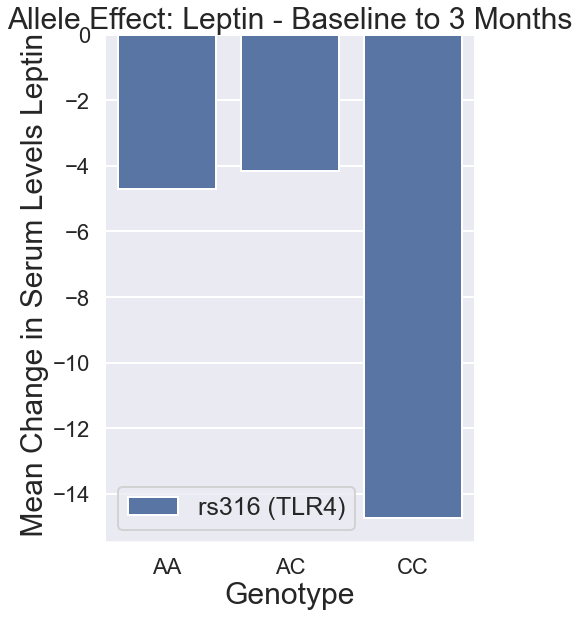

In [362]:
lep_data = { 'mean': [-4.717,-4.172,-14.74],
         #'mean': [-1.889,-3.084,-1.715,-2.873,-2.549,-1.675],
         'allele': ["AA","AC","CC"],
         'Gene': ["rs316 (TLR4)","rs316 (TLR4)","rs316 (TLR4)"],
         'sd' : [0,17.52,14.07]
       }
import pandas as pd
import matplotlib.pyplot as plt
df4 = pd.DataFrame(lep_data, columns=data.keys())

leptin_data= sns.catplot(data=df4, kind="bar", x="allele", y="mean",
               hue="Gene", legend_out=False, height=9,aspect= .8,)
leptin_data.despine(left=True)
leptin_data.set_axis_labels("Genotype"," Mean Change in Serum Levels Leptin")

plt.title("Allele Effect: Leptin - Baseline to 3 Months")
plt.legend(fontsize=25)

In [335]:
mean1 = 

,Diet Group,Phenotype,Value
0,IECR,Weight Loss (kg),NaN
1,IECR,Weight Loss (kg),1.600000
2,IECR,Weight Loss (kg),11.350000
3,IECR,Weight Loss (kg),9.200000
4,IECR,Weight Loss (kg),1.200000
...,...,...,...
214,DER,Reduction in BMI,4.822034
215,DER,Reduction in BMI,2.707813
216,DER,Reduction in BMI,NaN
217,DER,Reduction in BMI,1.006220
